## Telecom Churn: Logistic Regression with PCA

With 21 predictor variables, we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, customer attrition is referred to as 'churn'.

### Importing and Merging Data

In [3]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [5]:
print(len(churn_data))
print(len(customer_data))
print(len(internet_data))

7043
7043
7043


In [6]:
print(churn_data.shape)
print(customer_data.shape)
print(internet_data.shape)

(7043, 9)
(7043, 5)
(7043, 9)


In [7]:
#Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [8]:
#Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Let's understand the structure of our dataframe

In [10]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [11]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


### Data Preparation

In [13]:
# Converting Yes to 1 and No to 0
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

### Dummy Variable Creation

In [15]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True).astype(int)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True).astype(int)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True).astype(int)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines').astype(int)
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True).astype(int)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity').astype(int).astype(int)
os1= os.drop(['OnlineSecurity_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup').astype(int)
ob1 =ob.drop(['OnlineBackup_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection').astype(int)
dp1 = dp.drop(['DeviceProtection_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport').astype(int)
ts1 = ts.drop(['TechSupport_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV').astype(int)
st1 = st.drop(['StreamingTV_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies').astype(int)
sm1 = sm.drop(['StreamingMovies_No internet service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

### Dropping the repeated variables

In [17]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [18]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')
#telecom['tenure'] = telecom['tenure'].astype(int).astype(float)

In [19]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   int32  
 11  Cont

Now we can see we have all variables as integer.

### Checking for Outliers

In [22]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [23]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in your data. The numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [27]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [28]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [29]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Feature Standardisation

•	Most software packages use SVD to compute the principal components and assume that the data is scaled and centred, so it is important to do standardisation/normalisation.


In [33]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [34]:
normalized_df=(df-df.mean())/df.std()
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1)
telecom = pd.concat([telecom,normalized_df],axis=1)
telecom.head()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391


In [35]:
df.std()

tenure              24.545260
MonthlyCharges      30.085974
TotalCharges      2266.771362
dtype: float64

In [36]:
df-df.mean()

,tenure,MonthlyCharges,TotalCharges
0,-31.421786,-34.948208,-2253.450441
1,1.578214,-7.848208,-393.800441
2,-30.421786,-10.948208,-2175.150441
3,12.578214,-22.498208,-442.550441
4,-30.421786,5.901792,-2131.650441
...,...,...,...
7038,-8.421786,20.001792,-292.800441
7039,39.578214,38.401792,5079.599559
7040,-21.421786,-35.198208,-1936.850441
7041,-28.421786,9.601792,-1976.700441


In [37]:
normalized_df

,tenure,MonthlyCharges,TotalCharges
0,-1.280157,-1.161611,-0.994123
1,0.064298,-0.260859,-0.173727
2,-1.239416,-0.363897,-0.959581
3,0.512450,-0.747797,-0.195234
4,-1.239416,0.196164,-0.940391
...,...,...,...
7038,-0.343113,0.664821,-0.129171
7039,1.612459,1.276402,2.240896
7040,-0.872746,-1.169921,-0.854453
7041,-1.157934,0.319145,-0.872033


### Checking the Churn Rate

In [39]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We have almost 27% churn rate

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [43]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [46]:
import statsmodels.api as sm

In [47]:
print(X_train.dtypes)
print(y_train.dtypes)


PhoneService                               int64
PaperlessBilling                           int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
Contract_One year                          int32
Contract_Two year                          int32
PaymentMethod_Credit card (automatic)      int32
PaymentMethod_Electronic check             int32
PaymentMethod_Mailed check                 int32
gender_Male                                int32
MultipleLines_No                           int32
MultipleLines_Yes                          int32
InternetService_Fiber optic                int32
InternetService_No                         int32
OnlineSecurity_No                          int32
OnlineSecurity_Yes                         int32
OnlineBackup_No                            int32
OnlineBackup_Yes                           int32
DeviceProtection_No                        int32
DeviceProtection_Yes

In [48]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 06 Jan 2025   Deviance:                       4009.4
Time:                        20:44:57   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2783      1.187     -2.762      0.006      -5.605      -0.952
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4348      1.324     -2.594      0.009      -6.030      -0.839
OnlineSecurity_No                         0.0905      0.058      1.558      0.119      -0.023       0.204
OnlineSecurity_Yes                        0.0660      0.174      0.380      0.704      -0.275       0.407
OnlineBackup_No                          -0.0088      0.055     -0.161      0.872      -0.116       0.098
OnlineBackup_Yes                          0.1653      0.172      0.960      0.337      -0.172       0.503
DeviceProtection_No                      -0.0832      0.056     -1.487      0.137      -0.193       0.026
DeviceProtection_Yes                      0.2397      0.174      1.379      0.168      -0.101       0.580
TechSupport_No                            0.0935      0.058      1.604      0.109      -0.021       0.208
TechSupport_Yes                           0.0630      0.174      0.362      0.717      -0.278       0.404
StreamingTV_No                           -0.4016      0.133     -3.027      0.002      -0.662      -0.142
StreamingTV_Yes                           0.5581      0.267      2.094      0.036       0.036       1.081
Streaming

### Correlation Matrix

In [50]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: >

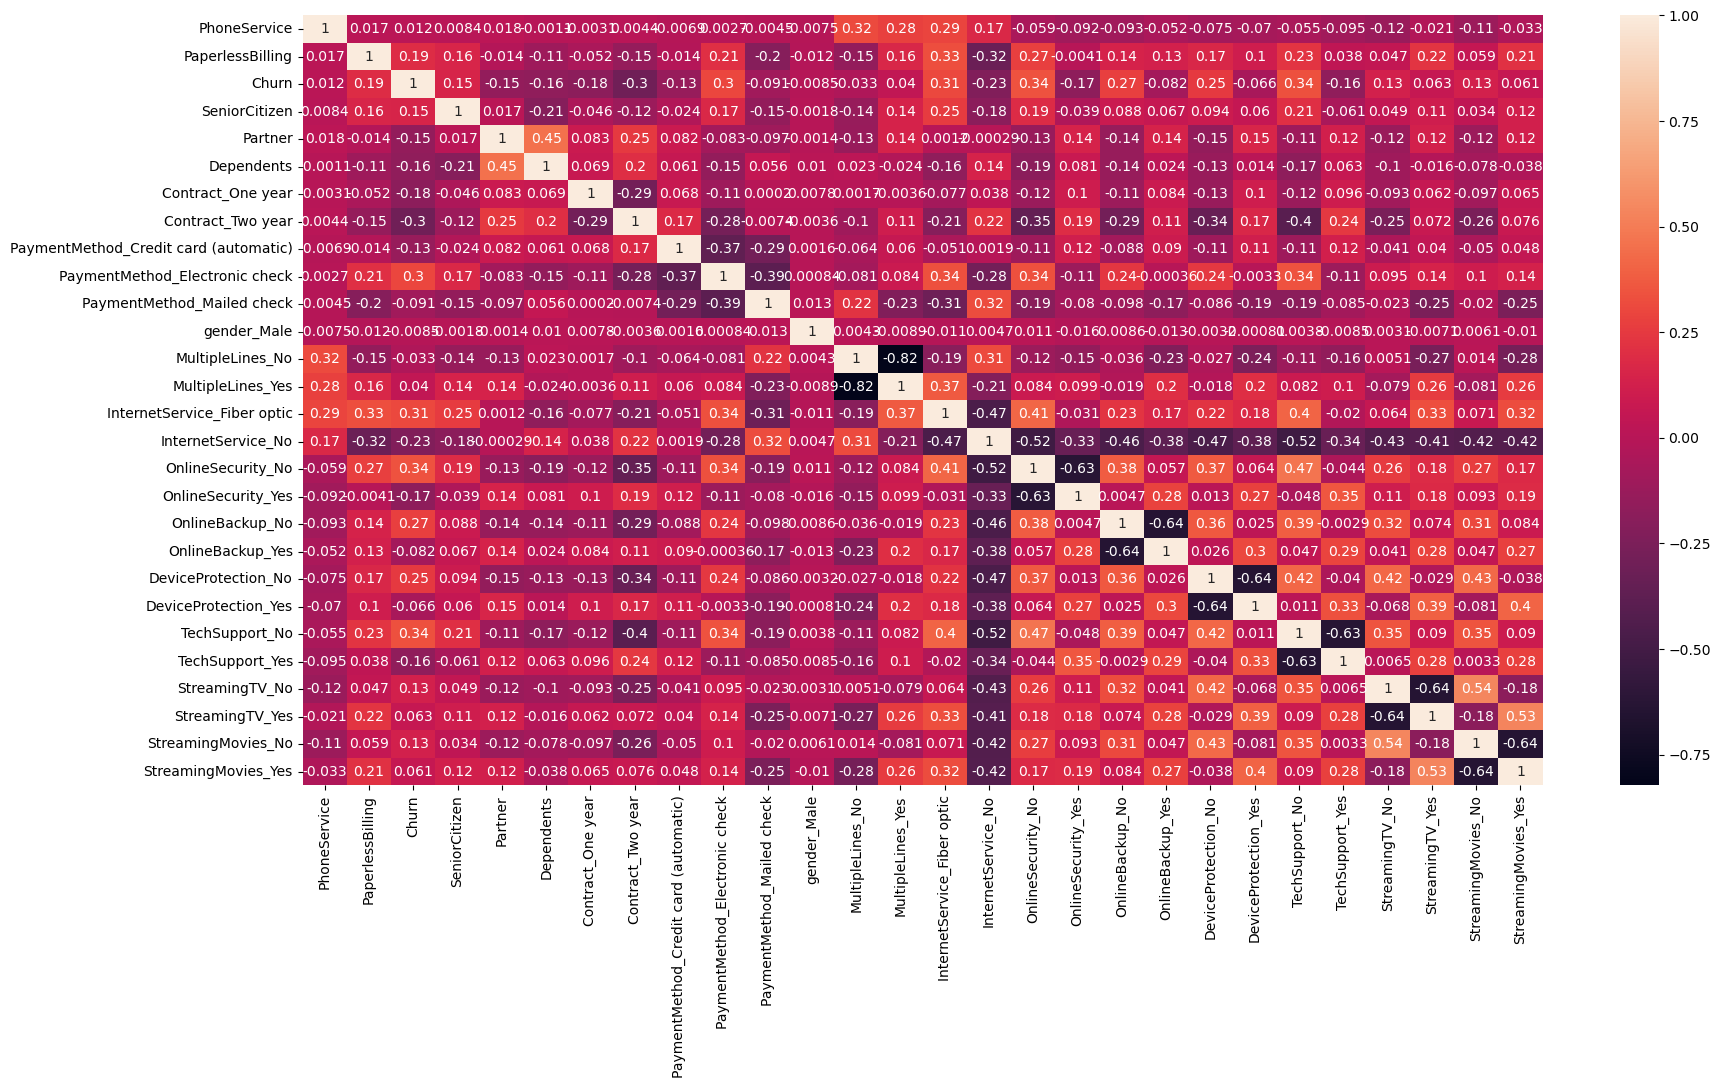

In [51]:
# Let's see the correlation matrix 

numerics = telecom.select_dtypes(['int'])

plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(numerics.corr(),annot = True)

### Dropping highly correlated variables.

In [53]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

<Axes: >

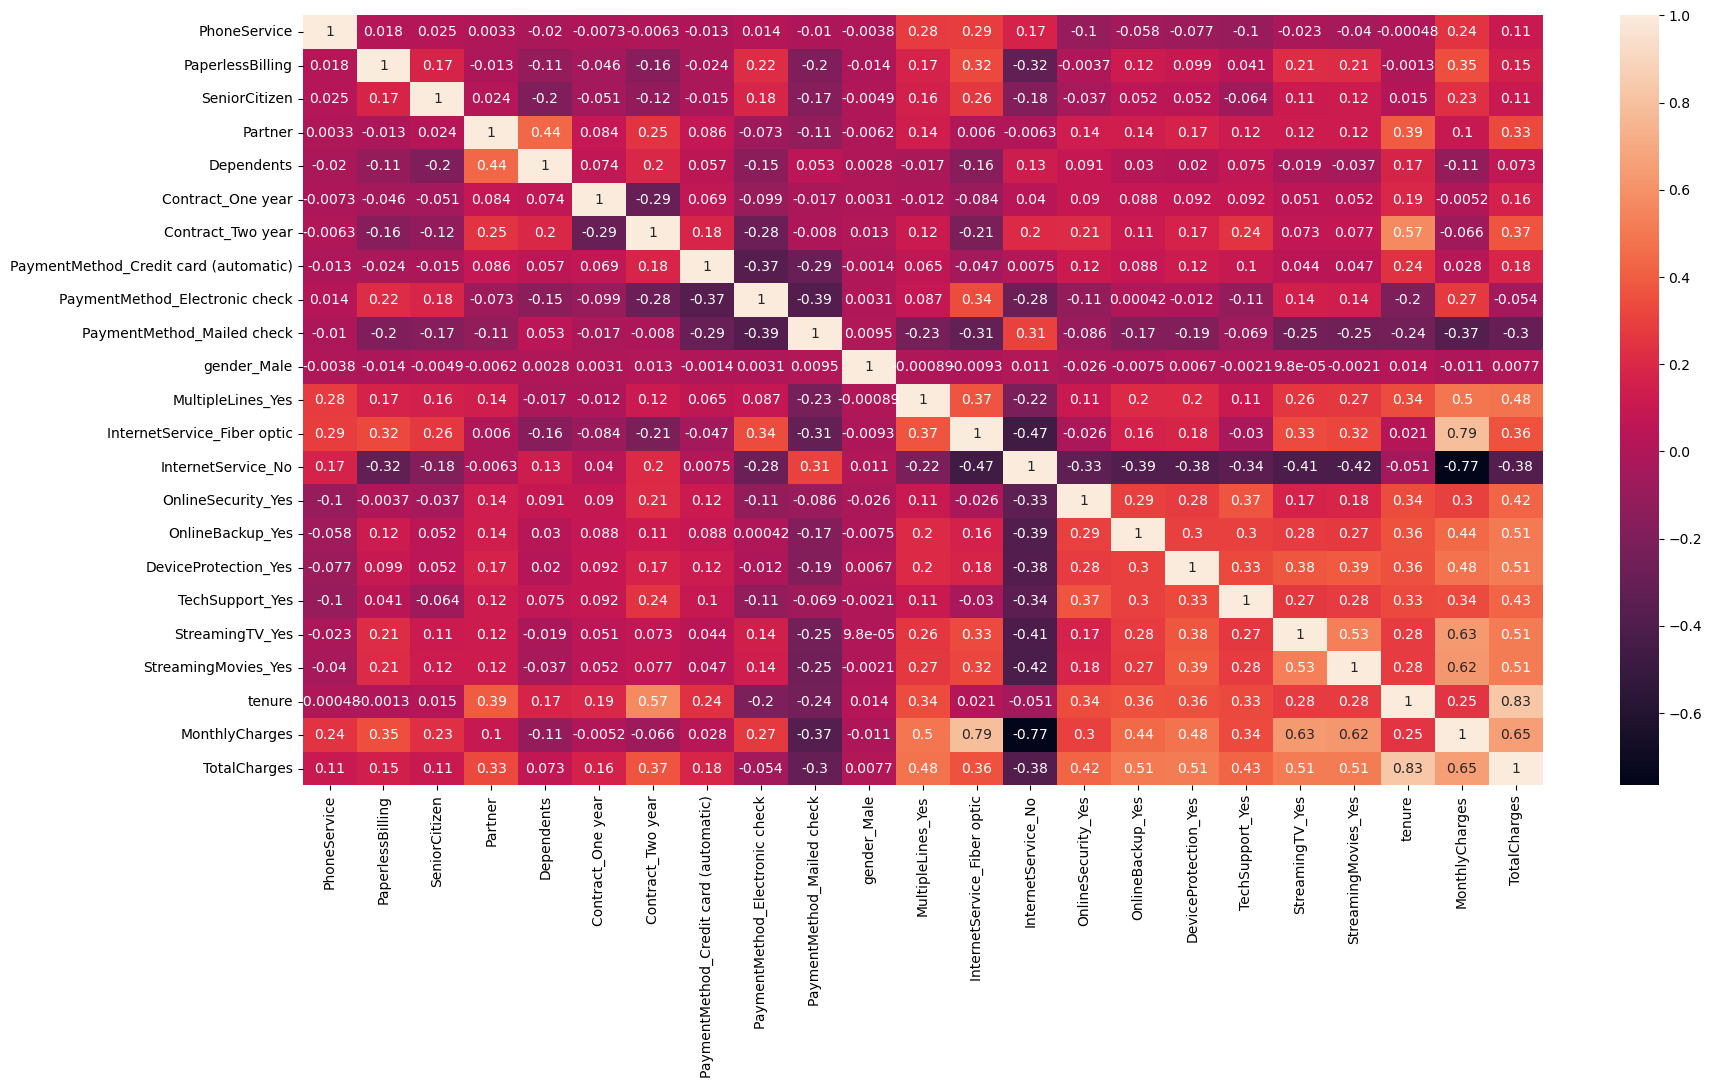

In [56]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

### Re-Running the Model

Now let's run our model again after dropping highly correlated variables

In [59]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 06 Jan 2025   Deviance:                       4009.4
Time:                        20:45:00   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

### Feature Selection Using RFE

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=13)  # Specify the number of features to select
rfe = rfe.fit(X, y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False  True False False False  True  True False  True False False  True
 False  True  True False  True False False False False False False  True
 False False  True  True  True  True]
[ 7  1  3 18  5  1  1 11  1 12 15  1 17  1  1  4  1 13  8 14 16  6  2  1
 10  9  1  1  1  1]


In [62]:
feature_rankings = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})

# Sort by ranking
feature_rankings = feature_rankings.sort_values(by='Ranking')
feature_rankings

,Feature,Ranking
14,InternetService_No,1
27,tenure,1
26,StreamingMovies_Yes,1
23,StreamingTV_No,1
16,OnlineSecurity_Yes,1
28,MonthlyCharges,1
13,InternetService_Fiber optic,1
11,MultipleLines_No,1
29,TotalCharges,1
1,PaperlessBilling,1


In [63]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [64]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
#logsk.fit(X_train[col], y_train)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [65]:
#Comparing the model with StatsModels
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
modres = logm4.fit()
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 06 Jan 2025   Deviance:                       4009.4
Time:                        20:45:01   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2783      1.187     -2.762      0.006      -5.605      -0.952
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4348      1.324     -2.594      0.009      -6.030      -0.839
OnlineSecurity_No                         0.0905      0.058      1.558      0.119      -0.023       0.204
OnlineSecurity_Yes                        0.0660      0.174      0.380      0.704      -0.275       0.407
OnlineBackup_No                          -0.0088      0.055     -0.161      0.872      -0.116       0.098
OnlineBackup_Yes                          0.1653      0.172      0.960      0.337      -0.172       0.503
DeviceProtection_No                      -0.0832      0.056     -1.487      0.137      -0.193       0.026
DeviceProtection_Yes                      0.2397      0.174      1.379      0.168      -0.101       0.580
TechSupport_No                            0.0935      0.058      1.604      0.109      -0.021       0.208
TechSupport_Yes                           0.0630      0.174      0.362      0.717      -0.278       0.404
StreamingTV_No                           -0.4016      0.133     -3.027      0.002      -0.662      -0.142
StreamingTV_Yes                           0.5581      0.267      2.094      0.036       0.036       1.081
Streaming

In [66]:
X_test[col].shape
#res = modres.predict(X_test[col])

(2110, 13)

### Making Predictions

In [68]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_1.head()

,1
0,0.437399
1,0.326681
2,0.004914
3,0.575600
4,0.007800


In [69]:
y_pred_df

,0,1
0,0.562601,0.437399
1,0.673319,0.326681
2,0.995086,0.004914
3,0.424400,0.575600
4,0.992200,0.007800
...,...,...
2105,0.986054,0.013946
2106,0.932373,0.067627
2107,0.997080,0.002920
2108,0.473784,0.526216


In [70]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
942,0
3730,1
1761,0
2283,1
1872,0


In [71]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['CustID', 'Churn', 'Churn_Prob'])

# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.437399
1,3730,1,0.326681
2,1761,0,0.004914
3,2283,1,0.575600
4,1872,0,0.007800


In [72]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.437399,0
1,3730,1,0.326681,0
2,1761,0,0.004914,0
3,2283,1,0.575600,1
4,1872,0,0.007800,0


### Model Evaluation

In [74]:
from sklearn import metrics

In [75]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1354,  174],
       [ 248,  334]], dtype=int64)

In [76]:
# Predicted     Churn  not_churn  __all__
# Actual
# Churn            1359   169     1528
# not_churn         256   326      582
# __all__          1615   751     2110

In [77]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

0.8

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

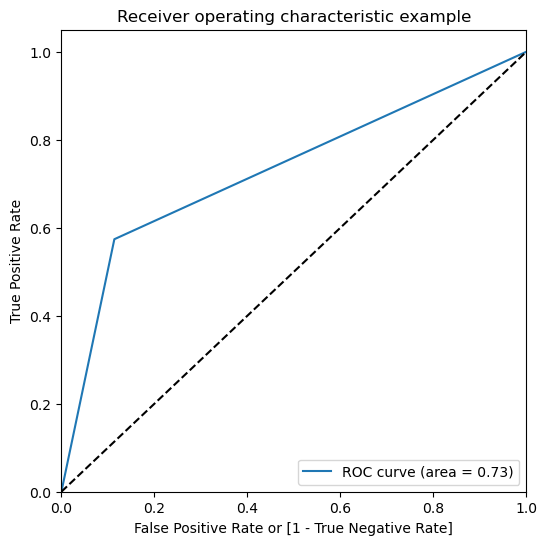

(array([0.        , 0.11387435, 1.        ]),
 array([0.        , 0.57388316, 1.        ]),
 array([inf,  1.,  0.]))

In [79]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [80]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn, y_pred_final.Churn_Prob))

'0.83'

#### We see an overall AUC score of 0.83 looks like we did a decent job.
- But we did spend a lot of effort on the features and their selection.
- Can PCA help reduce our effort?

### Some important problems with this process that can be pointed out are:

- Multicollinearity among a large number of variables, which is not totally avoided even after reducing variables using RFE (or a similar technique)
- Need to use a lengthy iterative procedure, i.e. identifying collinear variables, using variable selection techniques, dropping insignificant ones etc.
- A potential loss of information due to dropping variables
- Model instability due to multicollinearity

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

### Methods that PCA provides: 

- pca.fit() - Perform PCA on the dataset.
- pca.components_ -  Explains the principal components in the data
- pca.explained_variance_ratio_ - Explains the variance explained by each component
- pca.fit(n_components = k) - Perform PCA and choose only k components
- pca.fit_transform  - Transform the data from original basis to PC basis.
- pca(var) -  Here 'var' is a number between 0-1. Perform PCA on the dataset and choose the number of components automatically such that the variance explained is (100*var)%.

In [86]:
X_train.shape

(4922, 30)

In [87]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(random_state=42)

In [89]:
pca.fit(X_train)

PCA(random_state=42)

#### Components from the PCA

In [91]:
pca.components_

array([[ 1.76113503e-02,  6.73236050e-02,  3.33558780e-02,
         9.81025382e-02,  1.45144894e-02,  2.99711219e-02,
         8.03474721e-02,  4.45137169e-02,  1.03838839e-02,
        -9.64778216e-02,  5.46455027e-04, -1.44992416e-01,
         1.62603767e-01,  1.38408762e-01, -1.23559445e-01,
         1.07552300e-02,  1.12804215e-01, -2.93144081e-02,
         1.52873853e-01, -3.66586107e-02,  1.60218056e-01,
         2.26069096e-03,  1.21298754e-01, -5.19779044e-02,
         1.75537350e-01, -5.32208106e-02,  1.76780256e-01,
         4.50041974e-01,  4.64768058e-01,  5.64467383e-01],
       [ 1.58225213e-02,  1.51382114e-01,  7.60391859e-02,
        -1.10808074e-01, -1.15262476e-01, -5.70934546e-02,
        -1.99196237e-01, -6.98211144e-02,  1.94953309e-01,
        -7.22696236e-02, -6.84716202e-03, -3.64391587e-02,
         5.22616800e-02,  2.53405153e-01, -2.28888352e-01,
         2.80064773e-01, -5.11764215e-02,  2.29155531e-01,
        -2.67178910e-04,  2.30417558e-01, -1.52920583e-

Looking at the explained variance ratio for each component

In [93]:
pca.explained_variance_ratio_

array([3.27847827e-01, 1.75765007e-01, 6.03450801e-02, 4.55648825e-02,
       3.71944481e-02, 3.44939196e-02, 3.21953215e-02, 3.12085042e-02,
       3.00721929e-02, 2.81455178e-02, 2.67941203e-02, 2.51671298e-02,
       2.45802775e-02, 2.36931522e-02, 2.27788300e-02, 2.10982912e-02,
       1.53183204e-02, 1.12792045e-02, 8.45904722e-03, 7.12080502e-03,
       5.92788522e-03, 4.90401247e-03, 4.62235942e-05, 2.66625751e-17,
       6.13628054e-18, 5.11448493e-18, 3.85108834e-18, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

Making a scree plot for the explained variance

In [95]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [96]:
var_cumu

array([0.32784783, 0.50361283, 0.56395791, 0.6095228 , 0.64671724,
       0.68121116, 0.71340649, 0.74461499, 0.77468718, 0.8028327 ,
       0.82962682, 0.85479395, 0.87937423, 0.90306738, 0.92584621,
       0.9469445 , 0.96226282, 0.97354203, 0.98200107, 0.98912188,
       0.99504976, 0.99995378, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

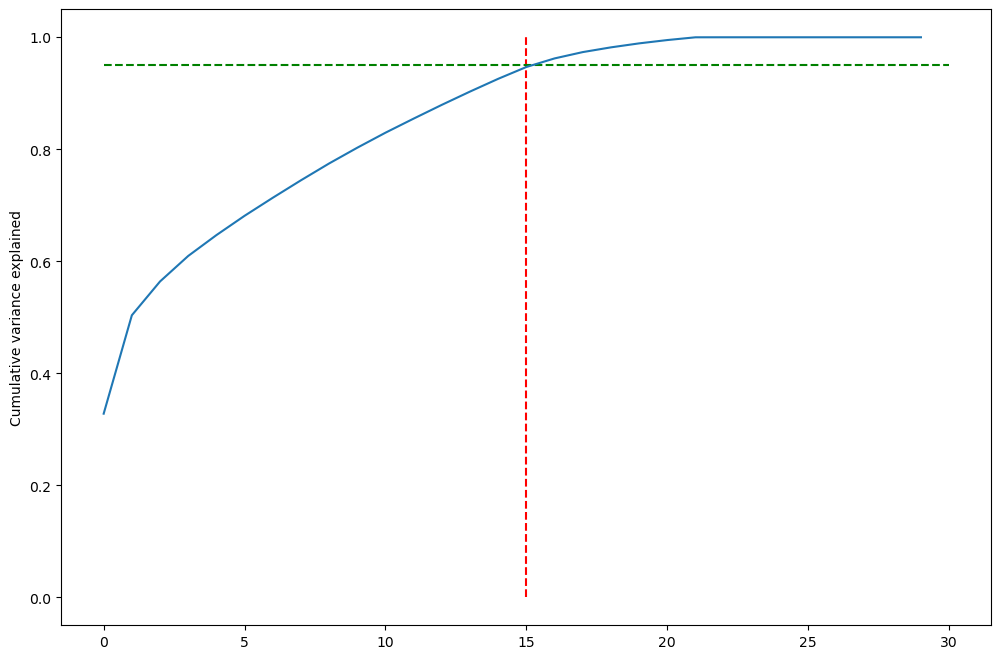

In [97]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 16 components

In [99]:
from sklearn.decomposition import IncrementalPCA

In [100]:
pca_final = IncrementalPCA(n_components=16)

In [101]:
# Incremental PCA will build one by one upto the mentioned 16 components while PCA builds all the components. 

In [102]:
df_train_pca = pca_final.fit_transform(X_train)

In [103]:
df_train_pca.shape

(4922, 16)

In [104]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [105]:
corrmat.shape

(16, 16)

Plotting the heatmap of the corr matrix

<Axes: >

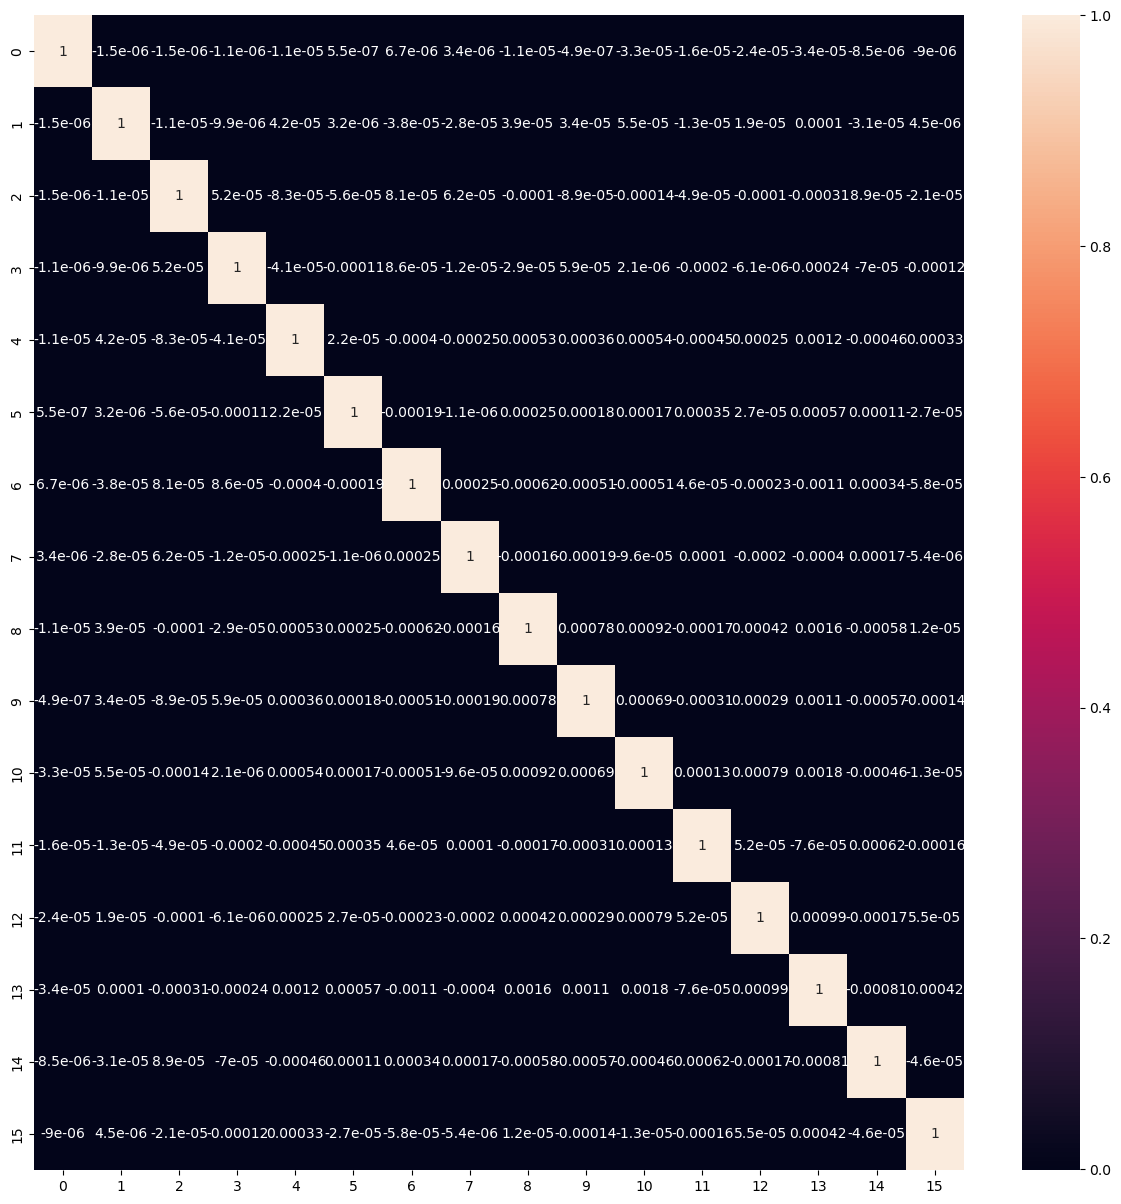

In [107]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [109]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2110, 16)

### Applying logistic regression on the data on our Principal components

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
learner_pca = LogisticRegression()

In [113]:
model_pca = learner_pca.fit(df_train_pca, y_train)

### Making predictions on the test set

In [115]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [116]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.83'

- As you could see, with PCA, you could achieve the same results with just a couple of lines of code. It will be helpful to note that the baseline PCA model has performed at par with the best Logistic Regression model built after the feature elimination and other steps.
- PCA helped us solve the problem of multicollinearity (and thus model instability) 
- Loss of information due to the dropping of variables, and we don't need to use iterative feature selection procedures.
- Our model becomes much faster because it has to run on a smaller dataset. And even then, our ROC score, which is a key model performance metric is similar to what we achieved previously.

#### Making it a little more unsupervised 

In [119]:
pca_again = PCA(0.9)
# instantizating PCA with amount of variance we want to capture

In [120]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [121]:
df_train_pca2.shape

(4922, 14)

Following it up with a logistic regression model

In [123]:
learner_pca2 = LogisticRegression()

In [124]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [125]:
df_test_pca2 = pca_again.transform(X_test)

In [126]:
df_test_pca2.shape

(2110, 14)

In [127]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [128]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.83'

### PCA is great!